<a href="https://colab.research.google.com/github/holdenkim/codingT/blob/main/BBGS_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#일변량 탐색

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("Ex_CEOSalary.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [ ]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


In [ ]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [ ]:
# Service, IT  , Finance , Other

indu_replce ={1:"Service", 2:"IT", 3:"Finance", 4:"Other"}
data['industry'] = data['industry'].replace(indu_replce)

In [ ]:
indu_replce

{1: 'Service', 2: 'IT', 3: 'Finance', 4: 'Other'}

In [ ]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,Service
1,1001,9958.000000,10.9,Service
2,1122,6125.899902,23.5,Service
3,578,16246.000000,5.9,Service
4,1368,21783.199219,13.8,Service


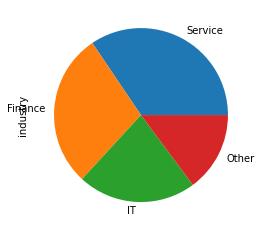

In [ ]:
%matplotlib inline

data['industry'].value_counts().plot(kind="pie")


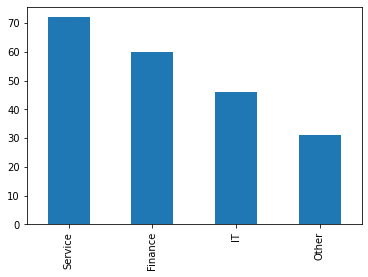

In [ ]:
data['industry'].value_counts().plot(kind="bar")

In [ ]:
data.describe()
#중위수와 평균이 비슷할수록 이상치가 많지 않다!

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [ ]:
print(data.skew())
print(data.kurtosis())

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64
salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca9207a810>,
      dtype=object)

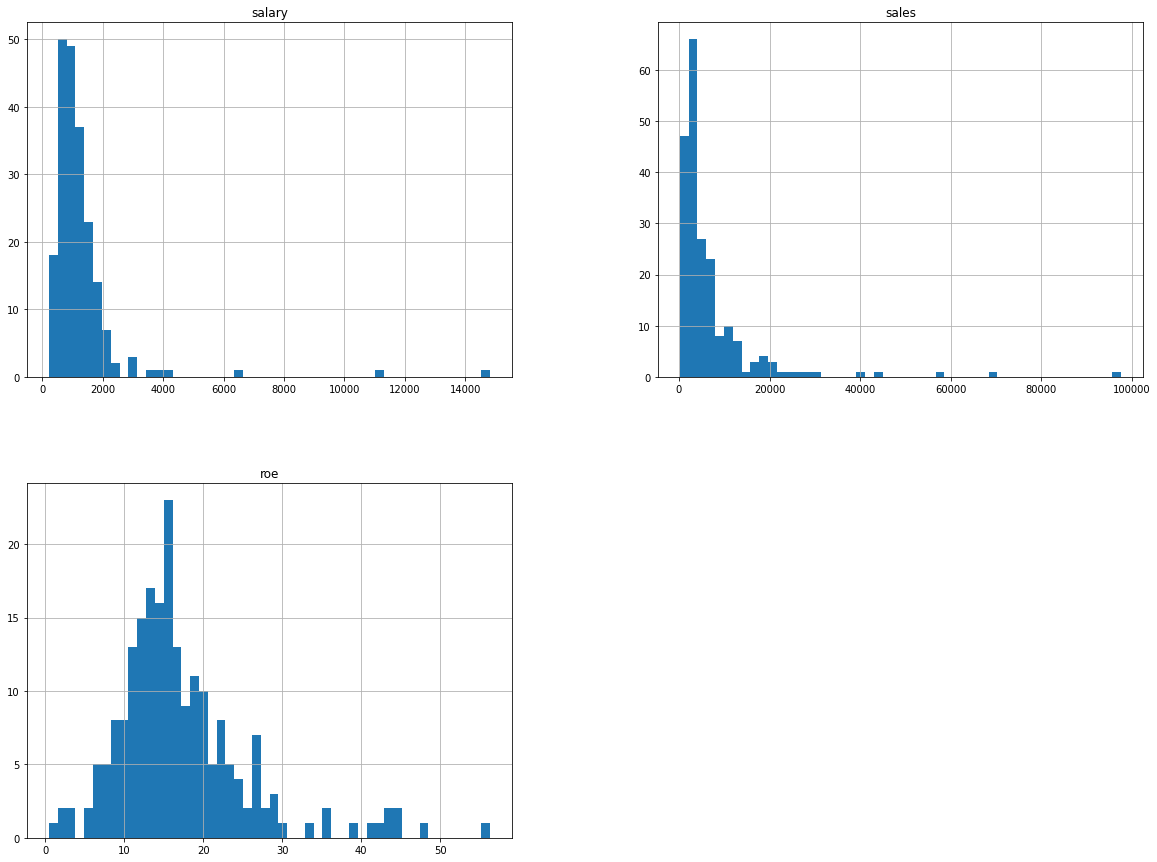

In [ ]:
data.hist(bins=50, figsize=(20,15))

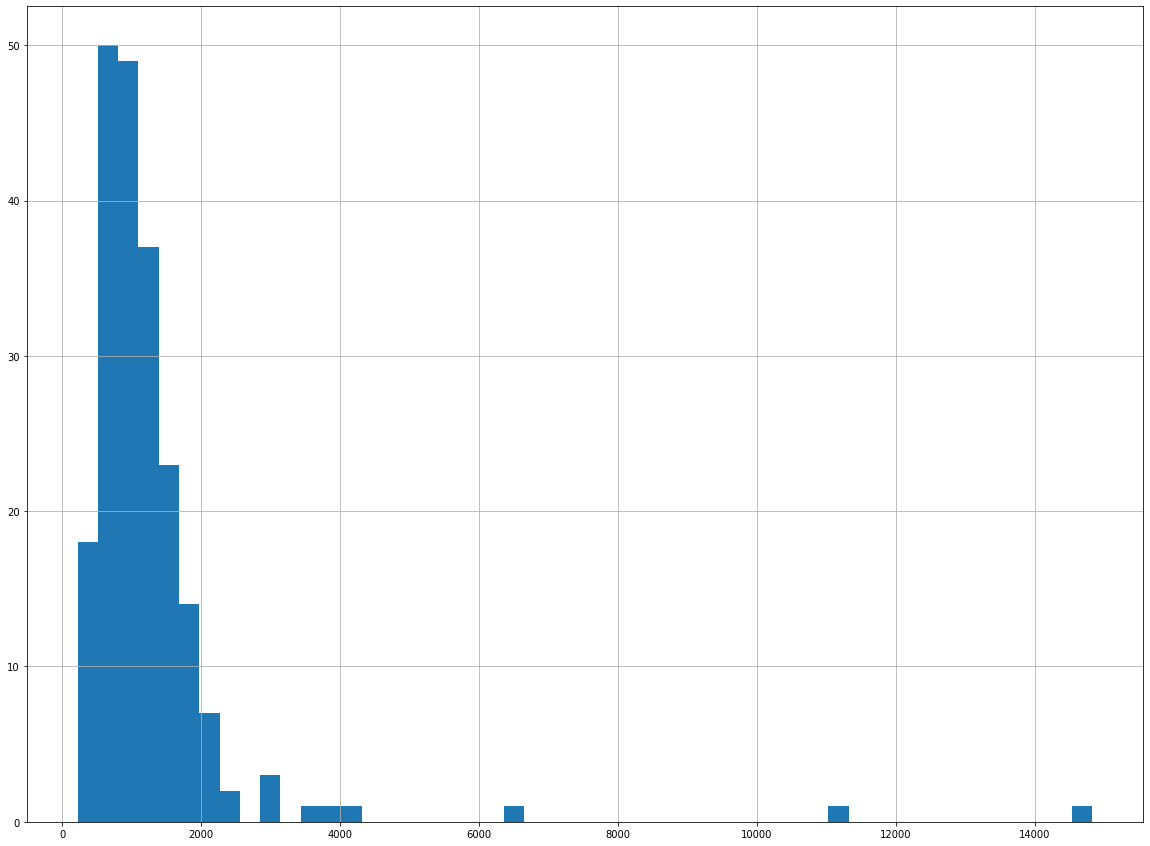

In [ ]:
data['salary'].hist(bins=50, figsize=(20,15))

#이변량탐색

In [ ]:
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [ ]:
data.corr(method='pearson')

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [ ]:
data.corr(method='spearman')

,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


In [ ]:
data.corr(method='kendall')

,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


In [ ]:
import matplotlib.pyplot as plt

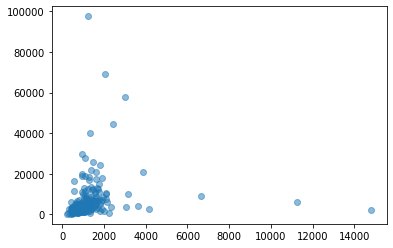

In [ ]:
plt.scatter(data['salary'], data['sales'], alpha=0.5)

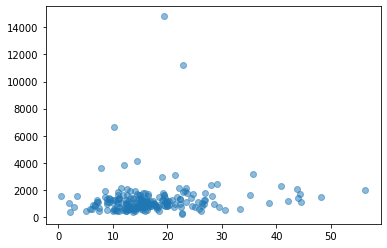

In [ ]:
plt.scatter(data['roe'], data['salary'], alpha=0.5)

In [ ]:
data.groupby('industry').describe()

salary                            ...        roe                   
          count         mean          std  ...        50%     75%        max
industry                                   ...                              
Finance    60.0  1722.416667  2242.687041  ...  21.400000  26.925  48.099998
IT         46.0  1344.913043  1002.813128  ...  14.750000  16.475  33.299999
Other      31.0   627.870968   175.264323  ...  12.300000  13.700  15.500000
Service    72.0  1153.875000   563.472032  ...  16.150001  19.525  56.299999

[4 rows x 24 columns]

In [ ]:
data.groupby('industry')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
Finance,60.0,1722.416667,2242.687041,223.0,911.00,1246.0,1643.75,14822.0
IT,46.0,1344.913043,1002.813128,441.0,884.00,1119.5,1406.00,6640.0
Other,31.0,627.870968,175.264323,333.0,501.50,607.0,726.00,1100.0
Service,72.0,1153.875000,563.472032,256.0,811.25,1064.0,1348.50,3844.0


#이상치 처리 및 변수 변환

Boxplot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca91b5a090>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fca91ad1ed0>, <matplotlib.lines.Line2D object at 0x7fca91ad4450>], 'caps': [<matplotlib.lines.Line2D object at 0x7fca91ad4990>, <matplotlib.lines.Line2D object at 0x7fca91ad4ed0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fca91ad1910>], 'medians': [<matplotlib.lines.Line2D object at 0x7fca91adc490>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fca91adc9d0>], 'means': []})

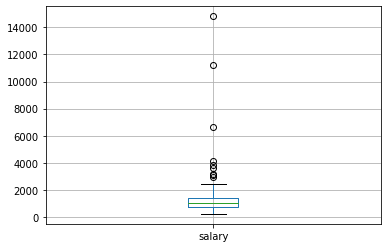

In [ ]:
data.boxplot(column='salary',return_type='both')

{'boxes': [<matplotlib.lines.Line2D at 0x7fca91ac6910>],
 'caps': [<matplotlib.lines.Line2D at 0x7fca91ac9990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fca91a4f9d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fca91a4f490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fca91ac6ed0>,
  <matplotlib.lines.Line2D at 0x7fca91ac9450>]}

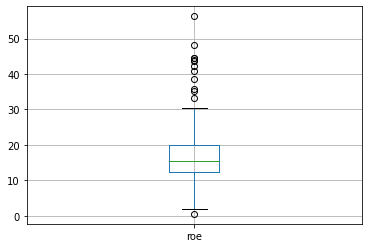

In [ ]:
data.boxplot(column='roe',return_type='dict')

In [ ]:
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary- Q1_salary

In [ ]:
data_IQR = data[(data['salary']> Q1_salary-IQR_salary*1.5) &(data['salary']< Q3_salary+IQR_salary*1.5)]

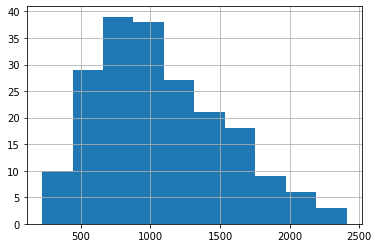

In [ ]:
data_IQR['salary'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca91a07550>,
      dtype=object)

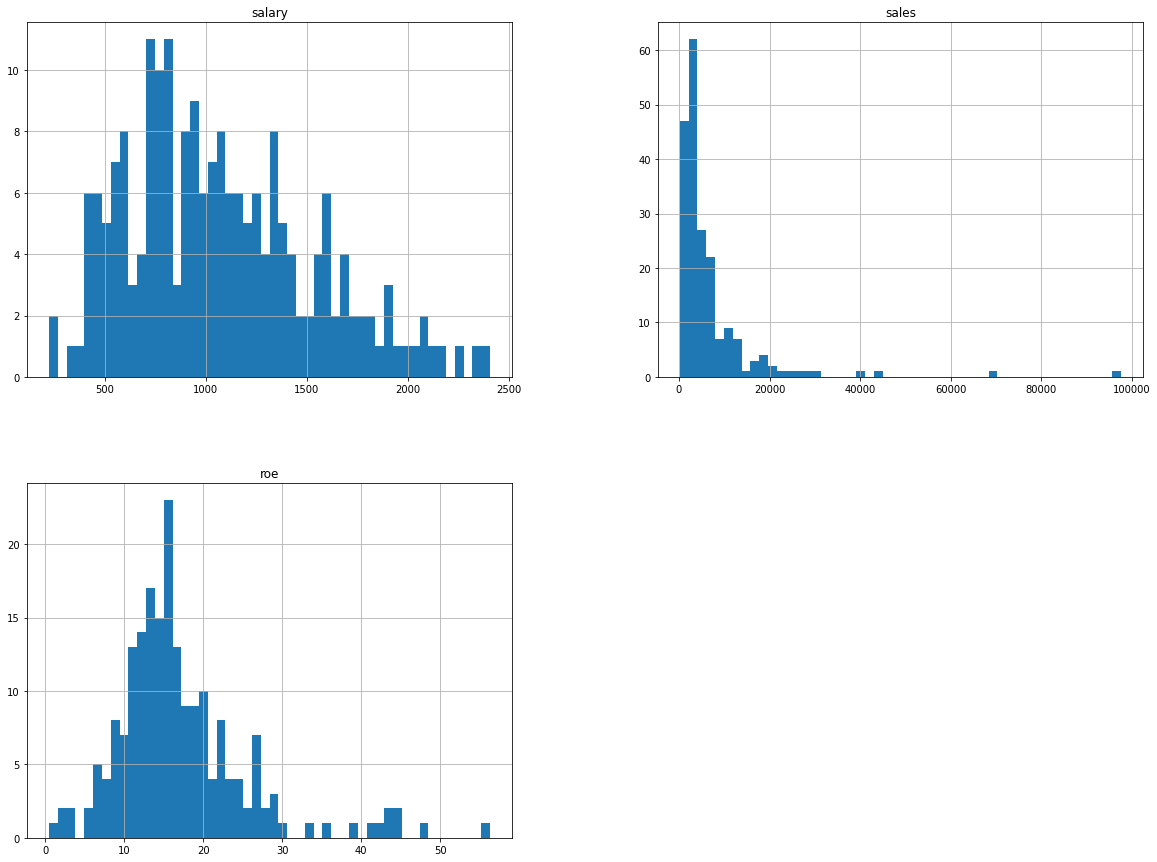

In [ ]:
data_IQR.hist(bins=50, figsize=(20,15))

In [ ]:
Q1_sales = data['sales'].quantile(0.25)
Q3_sales = data['sales'].quantile(0.75)

In [ ]:
IQR_sales = Q3_sales - Q1_sales

In [ ]:
data_IQR = data[(data['sales']> Q1_sales-IQR_sales*1.5) & (data['sales']< Q3_sales+IQR_sales*1.5 )&(data['salary']> Q1_salary-IQR_salary*1.5) &(data['salary']< Q3_salary+IQR_salary*1.5)]

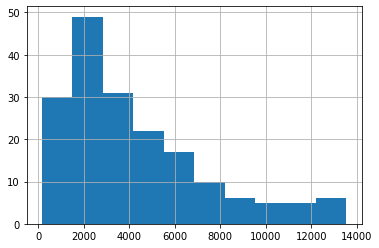

In [ ]:
data_IQR['sales'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca91b20990>,
      dtype=object)

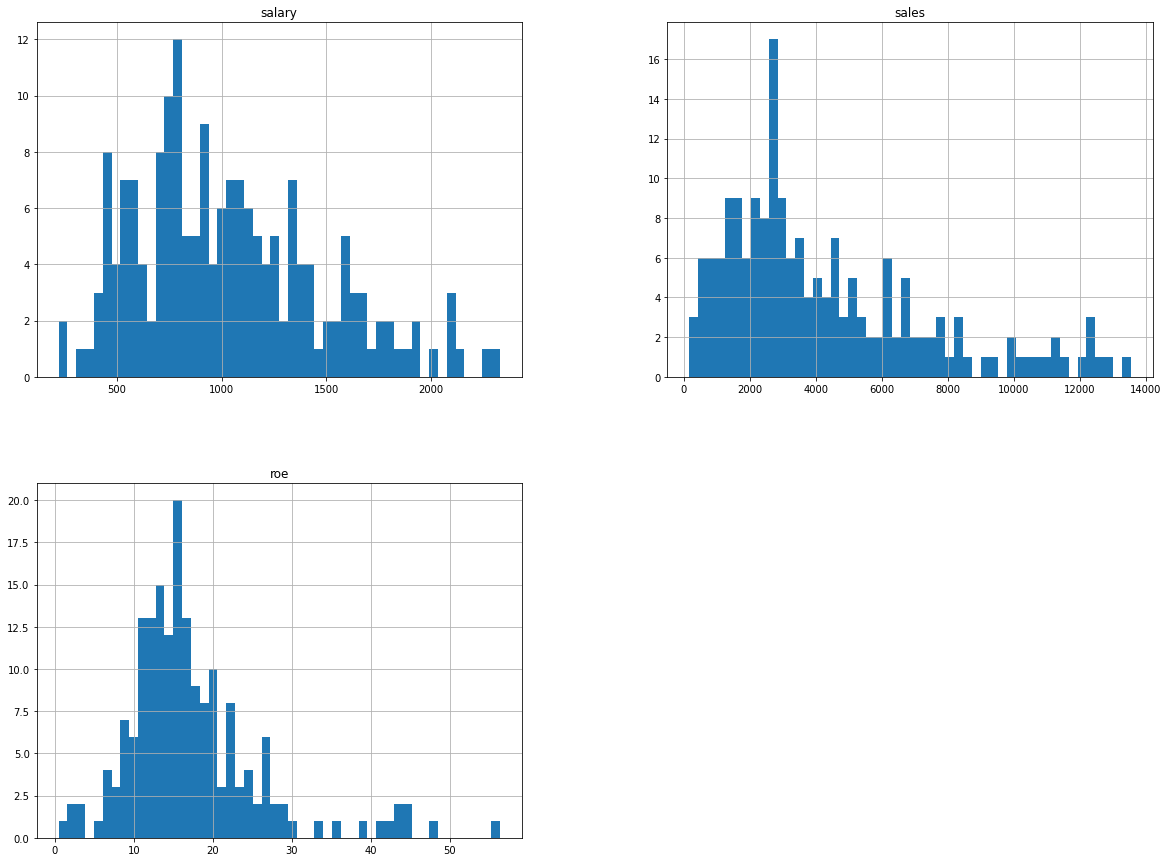

In [ ]:
data_IQR.hist(bins=50, figsize=(20,15))

In [ ]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000


In [ ]:
import numpy as np
data['log_roe'] = np.log(data['roe'])
data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])

In [ ]:
data.head()

,salary,sales,roe,industry,log_roe,log_salary,log_sales
0,1095,27595.000000,14.1,Service,2.646175,6.998510,10.225390
1,1001,9958.000000,10.9,Service,2.388763,6.908755,9.206132
2,1122,6125.899902,23.5,Service,3.157000,7.022868,8.720281
3,578,16246.000000,5.9,Service,1.774952,6.359574,9.695602
4,1368,21783.199219,13.8,Service,2.624669,7.221105,9.988894


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca9130a4d0>,
      dtype=object)

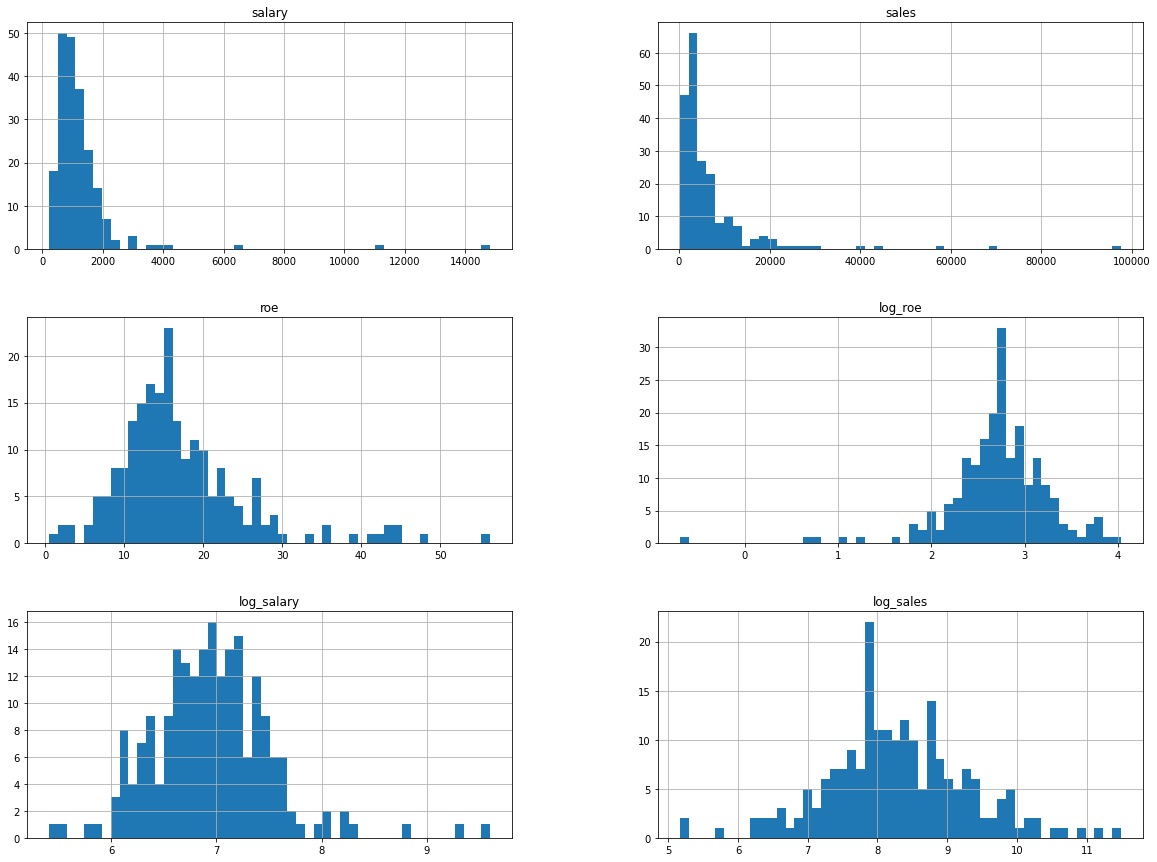

In [ ]:
data.hist(bins=50,figsize=(20,15))

In [ ]:
data.corr()

,salary,sales,roe,log_roe,log_salary,log_sales
salary,1.000000,0.119869,0.114842,0.101526,0.794208,0.194092
sales,0.119869,1.000000,-0.055386,-0.041004,0.281286,0.742921
roe,0.114842,-0.055386,1.000000,0.873419,0.208499,-0.122553
log_roe,0.101526,-0.041004,0.873419,1.000000,0.163548,-0.120642
log_salary,0.794208,0.281286,0.208499,0.163548,1.000000,0.459148
log_sales,0.194092,0.742921,-0.122553,-0.120642,0.459148,1.000000


In [ ]:
data['sqrt_roe'] = np.sqrt(data['roe'])
data['sqrt_salary'] = np.sqrt(data['salary'])
data['sqrt_sales'] = np.sqrt(data['sales'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca9130a710>,
      dtype=object)

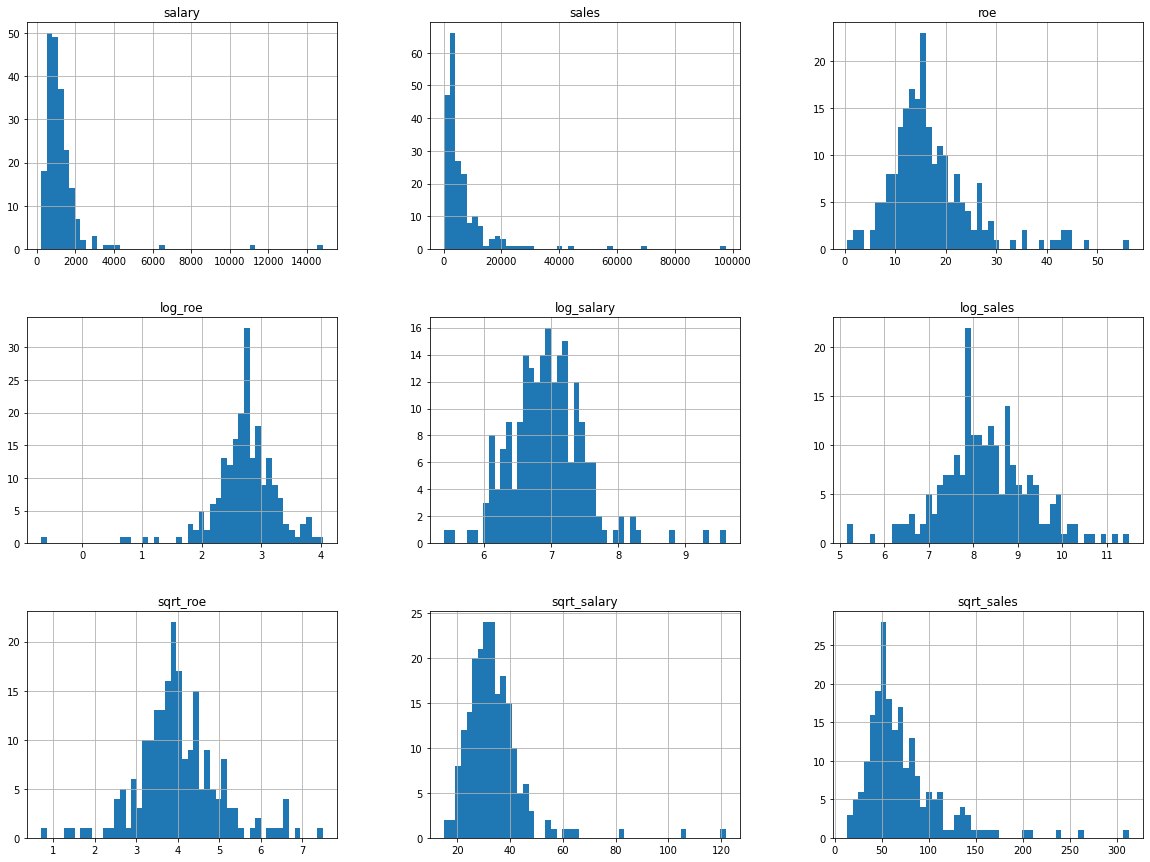

In [ ]:
data.hist(bins=50,figsize=(20,15))

In [ ]:
data.corr()

,salary,sales,roe,log_roe,log_salary,log_sales,sqrt_roe,sqrt_salary,sqrt_sales
salary,1.000000,0.119869,0.114842,0.101526,0.794208,0.194092,0.115219,0.945732,0.164340
sales,0.119869,1.000000,-0.055386,-0.041004,0.281286,0.742921,-0.050538,0.215716,0.936282
roe,0.114842,-0.055386,1.000000,0.873419,0.208499,-0.122553,0.977012,0.172327,-0.087687
log_roe,0.101526,-0.041004,0.873419,1.000000,0.163548,-0.120642,0.953806,0.139470,-0.083308
log_salary,0.794208,0.281286,0.208499,0.163548,1.000000,0.459148,0.197914,0.946014,0.386456
log_sales,0.194092,0.742921,-0.122553,-0.120642,0.459148,1.000000,-0.129020,0.342422,0.920797
sqrt_roe,0.115219,-0.050538,0.977012,0.953806,0.197914,-0.129020,1.000000,0.165932,-0.089501
sqrt_salary,0.945732,0.215716,0.172327,0.139470,0.946014,0.342422,0.165932,1.000000,0.293173
sqrt_sales,0.164340,0.936282,-0.087687,-0.083308,0.386456,0.920797,-0.089501,0.293173,1.000000


#결측치 처리

In [ ]:
import pandas as pd
data = pd.read_csv('Ex_Missing.csv')

In [ ]:
pd.isnull(data)

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [ ]:
data.isnull()

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    8 non-null      float64
 1   sales     8 non-null      float64
 2   roe       9 non-null      float64
 3   industry  10 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 448.0 bytes


In [ ]:
data.notnull()

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


In [ ]:
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [ ]:
data.isnull().sum(1)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

In [ ]:
data['missing'] = data.isnull().sum(1)

In [ ]:
data

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,NaN,9958.000000,10.900000,1,1
2,NaN,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,NaN,13.800000,1,1
5,1145.0,NaN,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


In [ ]:
data_del_row = data.dropna(axis=0)

In [ ]:
data_del_row

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
3,578.0,16246.000000,5.900000,1,0
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0


In [ ]:
data_del_c = data.dropna(axis=1)

In [ ]:
data_del_c

,industry,missing
0,1,0
1,1,1
2,1,1
3,1,0
4,1,1
5,2,1
6,2,0
7,2,0
8,2,0
9,2,1


In [ ]:
data_0 = data.fillna(0)

In [ ]:
data_0

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,0.0,9958.000000,10.900000,1,1
2,0.0,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,0.000000,13.800000,1,1
5,1145.0,0.000000,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,0.000000,2,1


In [ ]:
data_missing = data.fillna('missing')

In [ ]:
data_missing

,salary,sales,roe,industry,missing
0,1095,27595,14.1,1,0
1,missing,9958,10.9,1,1
2,missing,6125.9,23.5,1,1
3,578,16246,5.9,1,0
4,1368,missing,13.8,1,1
5,1145,missing,20,2,1
6,1078,2266.7,16.4,2,0
7,1094,2966.8,16.3,2,0
8,1237,4570.2,10.5,2,0
9,833,2830,missing,2,1


In [ ]:
data_ffill= data.fillna(method='ffill') #또는 pad도 같은 결과 반대는 'bfill'

In [ ]:
data_ffill

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1095.0,9958.000000,10.900000,1,1
2,1095.0,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,16246.000000,13.800000,1,1
5,1145.0,16246.000000,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,10.500000,2,1


In [ ]:
data_mean = data.fillna(data.mean()) #중위수는 median, max, min

In [ ]:
data.mean()

salary      1053.500000
sales       9069.825012
roe           14.600000
industry       1.500000
missing        0.500000
dtype: float64

In [ ]:
data_mean

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1053.5,9958.000000,10.900000,1,1
2,1053.5,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,9069.825012,13.800000,1,1
5,1145.0,9069.825012,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,14.600000,2,1


In [ ]:
data.groupby('industry').mean()

,salary,sales,roe,missing
industry,,,,
1,1013.666667,14981.224975,13.64,0.6
2,1077.400000,3158.425049,15.80,0.4


In [ ]:
fill_mean_func = lambda g: g.fillna(g.mean())

In [ ]:
data.groupby('industry').apply(fill_mean_func)

salary         sales        roe  industry  missing
industry                                                           
1        0  1095.000000  27595.000000  14.100000         1        0
         1  1013.666667   9958.000000  10.900000         1        1
         2  1013.666667   6125.899902  23.500000         1        1
         3   578.000000  16246.000000   5.900000         1        0
         4  1368.000000  14981.224975  13.800000         1        1
2        5  1145.000000   3158.425049  20.000000         2        1
         6  1078.000000   2266.699951  16.400000         2        0
         7  1094.000000   2966.800049  16.299999         2        0
         8  1237.000000   4570.200195  10.500000         2        0
         9   833.000000   2830.000000  15.800000         2        1

In [ ]:
fill_values ={ 1:1000, 2:2000}

In [ ]:
fill_func = lambda d: d.fillna(fill_values[d.name])

#데이터 정제 실전

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('house_raw.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17914 entries, 0 to 17913
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17914 non-null  int64  
 1   income       17914 non-null  float64
 2   bedrooms     17914 non-null  float64
 3   households   17914 non-null  float64
 4   rooms        17914 non-null  float64
 5   house_value  17914 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 839.8 KB


In [ ]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f180183d0>,
      dtype=object)

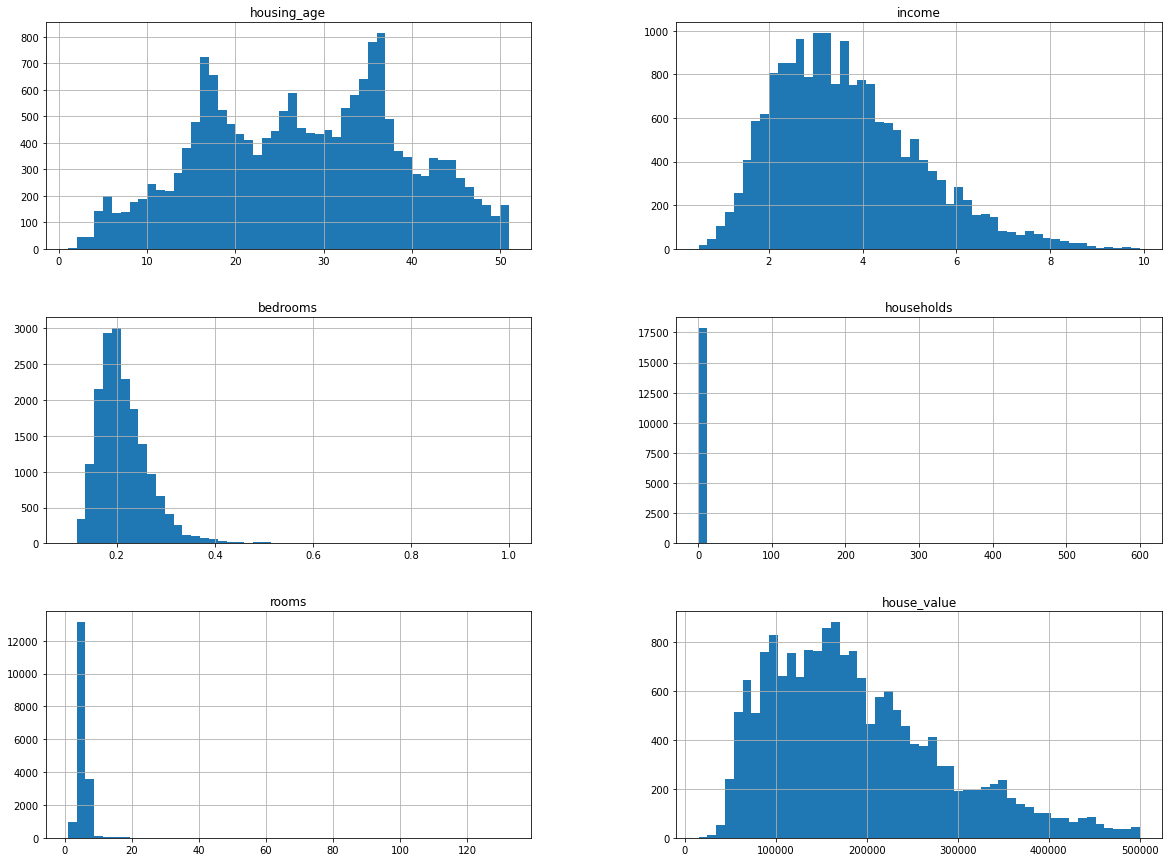

In [ ]:
data.hist(bins=50, figsize=(20 , 15))

In [ ]:
X = data[data.columns[0:5]]
y = data['house_value']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split( X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_scaled_minmax_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_train = lr.predict(X_scaled_minmax_train)
lr.score (X_scaled_minmax_train, y_train)

0.5463729131516732

In [ ]:
pred_train = lr.predict(X_scaled_minmax_test)
lr.score (X_scaled_minmax_test, y_test)

-2.822064801016148

In [ ]:
 data_bedroom= data[(data["bedrooms"] < 0.6)]

In [ ]:
data_housolds = data[(data['households']<10)]

In [ ]:
 data_bedroom= data[(data["rooms"] < 0.6)]

In [ ]:
new_data = data [ (data["bedrooms"] < 0.6) & (data['households']<7)  & (data["rooms"] < 12)]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X= new_data[new_data.columns[0:5]]
y = new_data[new_data.columns[5:]]

In [ ]:
X.shape

(17725, 5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

,housing_age,income,bedrooms,households,rooms
0,23,6.7770,0.141112,2.442244,8.103960
1,49,6.0199,0.160984,2.726688,5.752412
2,35,5.1155,0.249061,1.902676,3.888078
3,32,4.7109,0.231383,1.913669,4.508393
4,21,4.5625,0.255583,3.092664,4.667954


In [ ]:
scaler_minmax = MinMaxScaler()

In [ ]:
scaler_minmax.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_X_train = scaler_minmax.transform(X_train)
scaled_X_test = scaler_minmax.transform(X_test)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(scaled_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_train = model.predict(scaled_X_train)
print(model.score(scaled_X_train, y_train))

0.5666187268424732


In [ ]:
pred_test = model.predict(scaled_X_test)

In [ ]:
print(model.score(scaled_X_test, y_test))

0.5778417136170397


In [ ]:
new_data.to_csv('housing_price.csv',index=False)